# First partial exam

## Excercise 1:

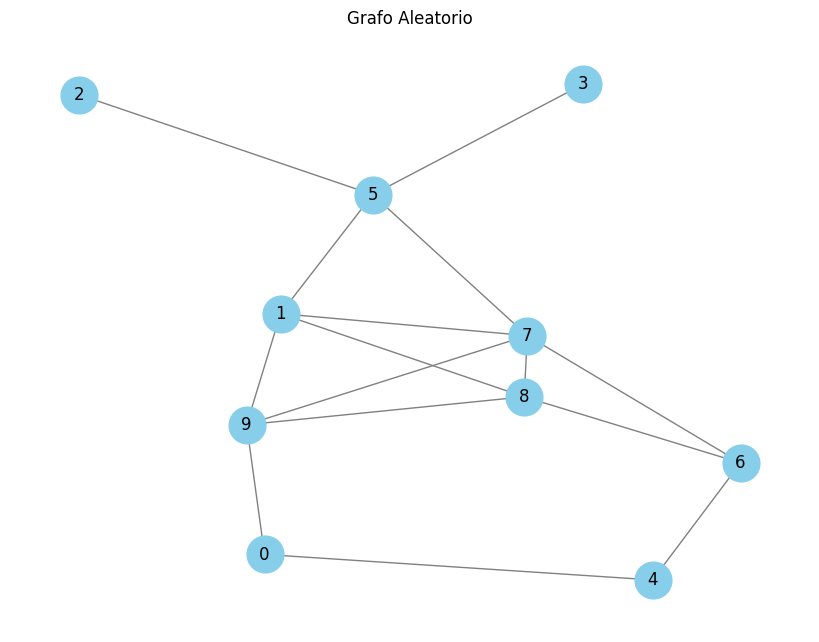

Nodos del grafo: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Aristas del grafo: [(0, 9), (0, 4), (1, 9), (1, 7), (1, 8), (1, 5), (2, 5), (3, 5), (4, 6), (5, 7), (6, 8), (6, 7), (7, 9), (7, 8), (8, 9)]
Grado de los nodos: {0: 2, 1: 4, 2: 1, 3: 1, 4: 2, 5: 4, 6: 3, 7: 5, 8: 4, 9: 4}
Vecinos del nodo 0: [9, 4]


In [1]:
# Generador
import networkx as nx
import matplotlib.pyplot as plt
import random

# Generation of a random graph
# Generacion de un grafo aleatorio
G = nx.gnm_random_graph(10, 15)

# Drawing the graph
# Dibujo del grafo
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.title("Grafo Aleatorio")
plt.show()

# Acceso a la información del grafo
# Access to graph information
nodos = list(G.nodes())
aristas = list(G.edges())
grados = dict(G.degree())

print("Nodos del grafo:", nodos)
print("Aristas del grafo:", aristas)
print("Grado de los nodos:", grados)

# Ejemplo de vecinos de un nodo específico
# Example of neighbors of a specific node
nodo = 0  # Nodo específico
vecinos = list(G.neighbors(nodo))
print(f"Vecinos del nodo {nodo}:", vecinos)

In [28]:
def dfs(graph, start, visited=None):
    if visited is None:
        visited = []

    visited.append(start)
    print(f"Visitando nodo: {start}")

    for next in graph[start]:
        if visited[-1] == 7:
          return visited
        if next not in visited:
            dfs(graph, next, visited)

dfs(G, 0)


Visitando nodo: 0
Visitando nodo: 9
Visitando nodo: 8
Visitando nodo: 6
Visitando nodo: 4
Visitando nodo: 7


[0, 9, 8, 6, 4, 7]

## Problema 2, optimizacion:

In [40]:
import math
import numpy as np
#x**3 - 6*x**2 + 9*x + 15

import random

def objective_function(x):
    return x**3 - 6*x**2 + 9*x + 15

def generate_individual():
    return random.uniform(3, 10) # DE 3 A ARRIBA

def generate_population(size):
    return [generate_individual() for _ in range(size)]

def evaluate_population(population):
    return [objective_function(individual) for individual in population]

def selection(population, fitness, num_parents):
    selected = []
    for _ in range(num_parents):
        idx1, idx2 = random.sample(range(len(population)), 2)
        if fitness[idx1] < fitness[idx2]:
            selected.append(population[idx1])
        else:
            selected.append(population[idx2])
    return selected

def crossover(parent1, parent2):
    alpha = random.uniform(0, 1)
    return alpha * parent1 + (1 - alpha) * parent2

def mutate(individual, mutation_rate):
    if random.random() < mutation_rate:
        individual += random.uniform(-1, 1)
    return individual

def genetic_algorithm(pop_size, n_generations, mutation_rate):
    population = generate_population(pop_size)

    for generation in range(n_generations):
        fitness = evaluate_population(population)

        parents = selection(population, fitness, pop_size // 2)

        new_population = []
        while len(new_population) < pop_size:
            parent1, parent2 = random.sample(parents, 2)
            child = crossover(parent1, parent2)
            child = mutate(child, mutation_rate)
            new_population.append(child)

        population = new_population

        best_individual = min(population, key=objective_function)
        best_fitness = objective_function(best_individual)
        print(f"Generation {generation+1}: Best x = {best_individual}, f(x) = {best_fitness}")

    return min(population, key=objective_function)

pop_size = 20
n_generations = 100
mutation_rate = 0.1

best_solution = genetic_algorithm(pop_size, n_generations, mutation_rate)

print(f"\nThe minimum value of the function is at x = {best_solution}")

Generation 1: Best x = 3.117002107086012, f(x) = 15.042670178720957
Generation 2: Best x = 3.117002107086012, f(x) = 15.042670178720957
Generation 3: Best x = 3.1224945236213726, f(x) = 15.046852744047985
Generation 4: Best x = 2.988458809695214, f(x) = 15.000398059945095
Generation 5: Best x = 2.946341546585443, f(x) = 15.008483193859938
Generation 6: Best x = 3.1442269394463076, f(x) = 15.065404353895559
Generation 7: Best x = 3.1484251445012745, f(x) = 15.069359879985022
Generation 8: Best x = 3.1485636232289065, f(x) = 15.069492420475353
Generation 9: Best x = 3.14867402748032, f(x) = 15.069598185056655
Generation 10: Best x = 3.1497320232569663, f(x) = 15.070615980231665
Generation 11: Best x = 3.1497320232569663, f(x) = 15.070615980231665
Generation 12: Best x = 3.1497517233642367, f(x) = 15.070635005002032
Generation 13: Best x = 3.14975372009358, f(x) = 15.070636933431174
Generation 14: Best x = 2.9066915435187, f(x) = 15.025307017057528
Generation 15: Best x = 3.00281272563163

## Ejercicio 3

In [42]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 12.5 MB/s eta 0:00:00


In [44]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Input variables
form_of_instruction = ctrl.Antecedent(np.arange(0, 11, 1), 'form_of_instruction')
clarity_of_intent = ctrl.Antecedent(np.arange(0, 11, 1), 'clarity_of_intent')
beneficiary_relation = ctrl.Antecedent(np.arange(0, 11, 1), 'beneficiary_relation')

# Output variable
validity = ctrl.Consequent(np.arange(0, 101, 1), 'validity')

# Membership functions for input variables
form_of_instruction['informal'] = fuzz.trimf(form_of_instruction.universe, [0, 0, 5])
form_of_instruction['semi_formal'] = fuzz.trimf(form_of_instruction.universe, [0, 5, 10])
form_of_instruction['formal'] = fuzz.trimf(form_of_instruction.universe, [5, 10, 10])

clarity_of_intent['vague'] = fuzz.trimf(clarity_of_intent.universe, [0, 0, 5])
clarity_of_intent['clear'] = fuzz.trimf(clarity_of_intent.universe, [0, 5, 10])
clarity_of_intent['very_clear'] = fuzz.trimf(clarity_of_intent.universe, [5, 10, 10])

beneficiary_relation['distant'] = fuzz.trimf(beneficiary_relation.universe, [0, 0, 5])
beneficiary_relation['close'] = fuzz.trimf(beneficiary_relation.universe, [0, 5, 10])
beneficiary_relation['immediate'] = fuzz.trimf(beneficiary_relation.universe, [5, 10, 10])

# Membership functions for output variable
validity['low'] = fuzz.trimf(validity.universe, [0, 0, 50])
validity['medium'] = fuzz.trimf(validity.universe, [0, 50, 100])
validity['high'] = fuzz.trimf(validity.universe, [50, 100, 100])

# Fuzzy rules
rule1 = ctrl.Rule(form_of_instruction['formal'] & clarity_of_intent['very_clear'] & beneficiary_relation['close'], validity['high'])
rule2 = ctrl.Rule(form_of_instruction['semi_formal'] & clarity_of_intent['clear'] & beneficiary_relation['close'], validity['medium'])
rule3 = ctrl.Rule(form_of_instruction['informal'] & clarity_of_intent['clear'] & beneficiary_relation['close'], validity['medium'])
rule4 = ctrl.Rule(form_of_instruction['informal'] & clarity_of_intent['vague'], validity['low'])
rule5 = ctrl.Rule(beneficiary_relation['distant'] & clarity_of_intent['vague'], validity['low'])
rule6 = ctrl.Rule(form_of_instruction['semi_formal'] & clarity_of_intent['very_clear'] & beneficiary_relation['immediate'], validity['high'])

# Create and simulate the fuzzy control system
validity_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
validity_simulation = ctrl.ControlSystemSimulation(validity_ctrl)

# Set input values for our specific case
validity_simulation.input['form_of_instruction'] = 3
validity_simulation.input['clarity_of_intent'] = 8
validity_simulation.input['beneficiary_relation'] = 7

# Compute the result
validity_simulation.compute()

print(f"Validity of the instruction: {validity_simulation.output['validity']:.2f}%")


Validity of the instruction: 54.81%
